# Electromagnetism Homework 1
## Caleb Young
## Due 1/23/2025
## Electromag 1 review

## Problem 1: 
Neatly sketch (or plot) the vector function $$v = \frac{\hat{\mathbf{r}}}{{r}^2}$$
and compute its divergence. The answer may surprise you... can you explain it?

### Solution: 
### Plotting the vector function: 
I will write this out as practice and as a reminder r hat is the unit vector pointing out from the origin. The 1/r^2 is the magnitude of the vector field at that point. It means that the field strength decreases with the square of the distance from the origin. So how do we express this in code? 

1. We can use numpy to handle the vector calculations and matplotlib to visualize the field. So we'll need to import those libraries into the coding block first. 

2. Following the Jupyter Notebooks guide we can calculate the vector field. We must remember that r is a radial term for distance from the origin at an angle $\theta$. This means we will have to represent the distance r with x and y components. To do this we can use this geometric equation $r = \sqrt{x^2+y^2}$. With that we can calculate $\hat{r}$ in the x and y directions using $\hat{r}_x = x / r$ and vice versa for y. Next we can take care of the magnitude of the vector field at any point using the equation we are given $mag = 1 / r^2$. Since $\hat{r} = r/r$ we can rewrite the original equation as $v = r / r^3$. Now we can use this to calculate the vector field's x and y components using $f_x = mag * \hat{r}_x$ & $f_y = mag * \hat{r}_y$. 

3. We can now start to set up the plot. First we must define the plot area. Following the guide we can use x = np.linspace(-2, 2, 20) where -2 is the left most point on the graph, 2 is the right most, and 20 is how many points or steps there are between those. The same goes for the y axis. Now we can set up the plot evironment like the guide shows. I ended up not using the guide and looked back at some stuff from deeplearning that used jupyter notebooks. I found it easier using plt.(insert thing). Had to look up some stuff and went ahead and verified if my plot was correct and it should be. 

### Computing the divergence: 
The divergence equation is as follows:    $$\nabla \cdot \vec{v} = \frac{\partial v_x}{\partial x} + \frac{\partial v_y}{\partial y} + \frac{\partial v_z}{\partial z}$$

Since we are only in 2D coordinates we can cut out the Z component:    $$\nabla \cdot \vec{v} = \frac{\partial v_x}{\partial x} + \frac{\partial v_y}{\partial y}$$

We could also do this in spherical coordinates. Looking back at my notes from ElectroMag 1:    $$\nabla \cdot \vec{v} = \frac{1}{r^2}\frac{\partial}{\partial r}\left(r^2 v_r\right) + \frac{1}{r\sin{\theta}}\frac{\partial}{\partial \theta}\left(\sin{\theta}v_\theta\right)$$

So obviously we used some cartesian math to convert the x and y components to the radial component r. Since we want to calculate the divergence about a point it would probably be better to do this in spherical coordinates. In 2D spherical coordinates the phi ($\phi$) component can be taken out of the equation. Adding to this; since the vector field is pointed radially outward there is no divergence in the $\theta$ direction. This means that we can cross out this entire part of the equation and we are left with: $$\nabla \cdot \vec{v} = \frac{1}{r^2}\frac{\partial}{\partial r}\left(r^2 v_r\right)$$


Now the equation is even more simple. We are left with one component to deal with $V_r$. This can be described by the equation we were given $\frac{1}{r^2}$. The distance from the origin or the surface area that the vector field covers can be described by $r^2$. The field strength based on the equation drops as $\frac{1}{r^2}$. We simply plug in numbers now. $$\nabla \cdot \vec{v} = \frac{1}{r^2}\frac{\partial}{\partial r}\left(r^2\frac{1}{r^2}\right)$$
This then becomes: $$\nabla \cdot \vec{v} = \frac{1}{r^2}\frac{\partial}{\partial r}\left(1\right)$$
The partial derivative with respect to r of 1 is 0. $$\frac{\partial}{\partial r}\left(1\right) = 0$$
From this we already know that anything multiplied by 0 is 0. So $$\nabla \cdot \vec{v} = \frac{1}{r^2}\frac{\partial}{\partial r}\left(r^2 v_r\right) = 0$$

Why is this the case though? My thought process is that each vector no matter its place in the 2D space has another vector in the same place opposite to it so they cancel each other out. After some research I found a nice explanation. Imagine a lightbulb in a dark room with two spheres around it. The amount of light exiting the first sphere is the same as the amount of light entering and exiting the second larger sphere. There is more surface area to cover so the light would just look more dim further away. This reminded me of flux through a plane. 

What is interesting is at the point r = 0. Here the divergence of the field is infinite. I see why this question is on the homework because this whole thing is representative of a point charge in space. Its the source of the electric field where the vector field is diverging from (even though its 0). 

This is just like the dirac delta function, but yes the divergence is 0. 

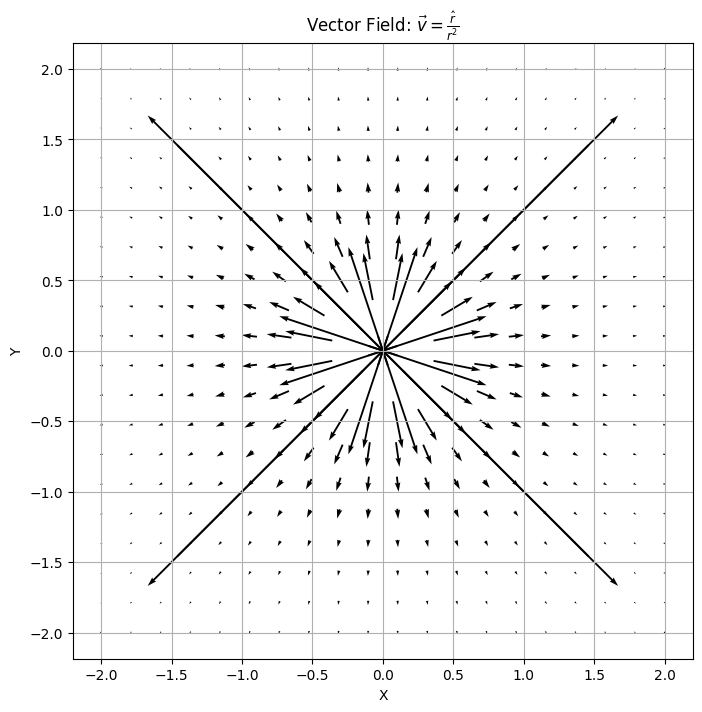

In [9]:
# Following the Intro to Jupyter Notebook tutorial: 
# first import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# for this plot well have to express r in terms of x and y coordinates because
# r is a radial component 
# we can define the plot area and create a grid of points
x = np.linspace(-2, 2, 20) # values from -2 to 2 in 20 steps
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y) # create a mesh grid

r = np.sqrt(X**2 + Y**2) + 1e-9 # adding a small number to avoid division by zero

# now we can define the vector components based on the formula v = r_vector / r^3
U = X / r**3 # x-component
V = Y / r**3 # y-component

# now we can create the plot
plt.figure(figsize=(8, 8)) # set the figure size

# found this cool thing called quiver that plots vector field arrows
plt.quiver(X, Y, U, V, pivot='mid') # create the quiver plot

# now we can add labels and a title
plt.title(r'Vector Field: $\vec{v} = \frac{\hat{r}}{r^2}$') # title with LaTeX formatting :/ 
plt.xlabel('X') # x-axis label
plt.ylabel('Y') # y-axis label
plt.axis('equal') # equal scaling for both axes
plt.grid(True) # creates the grid lines
plt.show()

## Problem 2: [*]
In 1897 J.J. Thomson “discovered” the electron by measuring the charge-to-mass ratio of 
“cathode rays” (actually, streams of electrons with charge q and mass m) as follows:

1. First he passed the beam through uniform crossed electric and magnetic fields E and B (mutually perpendicular, both of them perpendicular to the beam), and adjusted the electric field until he got zero deflection. What, then, was the speed of the particles (in terms of E and B)?

2. Thomson apparently didn’t record the field magnitudes he used but we can make reasonable assumptions based upon the technology of the time. Assume the magnitude of the electric field is $$2 * {10}^{4}\frac{V}{m}$$ and the magnitude of the magnetic field is $$2 * {10}^{-3} T$$ Using these values what was the speed of the particles from the first part?

3. Then he turned off the electric field, and measured the radius of curvature, R, of the beam, as deflected by the magnetic field alone. In terms of E, B, and R, what is the charge-to-mass ratio (q/m) of the particles? Given the geometry the radius, R, was likely in the range 1-5 cm. Using those values and the values for the zero-deflection velocity and magnitude of the magnetic field, calculate the charge-to-mass ratio for the electron. Compare the value to a calculation using the modern accepted values of charge and mass of the electron.

4.  In this part you will numerically simulate the electron trajectory through the fields and compare against 
your analytic results above. Use the modern accepted values of charge and mass for the electron.
Geometry and initial conditions: Assume the electron enters the field region at t = 0 with position $$r(0) = x(0)\hat{x} + y(0)\hat{y} + z(0)\hat{z} = 0\hat{x} + 0\hat{y} + 0\hat{z}$$ and initial velocity $$v(0) = 0\hat{x} + 0\hat{y} + 0\hat{z}$$ (i.e., the beam initially travels along $+\hat{y}$). Choose constant fields $$E = E\hat{x}+0\hat{y}+0\hat{z} , B = 0\hat{x} + 0\hat{y} + B\hat{z}, $$
so that E is perpendicular to B and both are perpendicular to the initial beam direction. 

Equation of Motion: Use the Lorentz force law, $$m\frac{dv}{dt}=q(E+v*B), \frac{dr}{dt} = v.$$ Define the acceleration function: 